**Препроцесинг (попередня обробка) даних**  — це етап підготовки даних перед тим, як вони будуть використані в алгоритмах машинного навчання або аналітичних моделях. Цей процес полягає в очищенні, трансформації та форматуванні даних для того, щоб вони відповідали вимогам моделей машинного навчання і могли забезпечити точні та надійні результати.

1. Перетворення типів даних у правильний формат.  
2. Обробка аномалій та викидів в даних.
3. Видалення та аповнення пропусків в даних:  
- 3.1. Заповнення пропусків в кількісних змінних.
- 3.2. Заповнення пропусків у категоріальних змінних.  
4. Перетворення даних:  
- 4.1. Перетворення категоріальних змінних у числовий формат для моделей машинного навчання.  
- 4.2. Масштабування (шкалювання) кількісних змінних. 

In [ ]:
import pandas as pd

# встановимо, що в числах типу float виводити 2 знаки після роздільника
pd.options.display.float_format = '{:.2f}'.format


df = pd.read_csv('students_survey.csv')
df.head()

Цей датасет представляє собою інформацію, зібрану в рамках опитування студентів технічних спеціальностей. Нижче наведено опис кожного стовпця датасету:  
- Age - Вік студента на момент збору даних.  
- Grade_level - Рік навчання студента на освітній програмі. Це категоріальне значення, яке може приймати такі значення:  
Freshman (перший курс),  
Sophomore (другий курс),  
Junior (третій курс),  
Senior (четвертий курс).  
- Study_hours_per_week - Кількість годин, витрачених студентом на навчання протягом тижня. Це кількісне значення з можливими значеннями від 5 до 40 годин.  
- Preferred_study_method - Обраний студентом метод навчання, може приймати такі варіанти:  
Lecture (лекції),  
Practical (практичні заняття),  
Self-study (самостійне навчання),  
Group-study (групове навчання).  
- Absent_days - Кількість днів, протягом яких студент був відсутній на заняттях поточного семестру. Це кількісне значення, що може варіюватися від 0 до 15 днів. 
- Math_test_score - Середній бал студента з математичних предметів. Це кількісне значення, яке варіюється від 50 до 100 балів.  
- Extracurricular_participation - Участь студента в позанавчальних активностях. Це категоріальне значення з можливими варіантами "Yes" (так) або "No" (ні).  
- Preferred_language - Обрана студентом мова програмування для виконання проектних робіт. Можливі варіанти:  
Python,  
C++,  
Java,
R.  
- Satisfaction_level - Рівень задоволеності студентом навчальними приміщеннями, виражений у відсотках. Це кількісне значення в діапазоні від 50% до 100%.  
- Future_plans - Плани студента після закінчення навчання, може містити такі варіанти:  
Higher education (продовження навчання),  
Employment (працевлаштування),  
Freelancing (фріланс),  
Undecided (не визначився).  

In [ ]:
df.info()

**Довідково: Що таке кількісні (числові) та категоріальні змінні?  
1. Кількісні змінні — це змінні, які приймають числові значення, що виражають кількість або результат вимірювання. Вони використовуються для опису величин, які можна виміряти або порахувати.  
2. Категоріальні змінні (часто задаються в датасеті у вигляді тексту) — це змінні, які приймають значення, що належать до певних категорій або груп. Ці значення не можна порахувати або виміряти як кількість, але їх можна класифікувати або розділити на групи.  

  **Відмінності між кількісними та категоріальними змінними**
| Характеристика   | Кількісні змінні                                  | Категоріальні змінні                             |
|------------------|--------------------------------------------------|--------------------------------------------------|
| **Тип даних**    | Числові (дискретні або неперервні)               | Категорії (номінальні або порядкові)             |
| **Приклад**      | Вік, зарплата, час, кількість студентів          | Стать, рівень освіти, місто проживання           |
| **Вимірюваність**| Можна виміряти або порахувати                    | Не можна виміряти, але можна класифікувати       |
| **Операції**     | Можна виконувати арифметичні операції (додавання, віднімання) | Можна лише класифікувати або впорядковувати      |


### 1.Перетворення типів даних у правильний формат.  
Іноді при зчитувані даних в датафрейм тип даних в деяких стовпчиках розпізнається некоректно. Наприклад, в даному датафреймі в стовпчику Math_test_score міститься числова інформація, проте Pandas відніс інформацію в цьому стовпчику до типу object, тобто до текстової інформації. Це може трапитися через наявність нечислових символів, таких як відсотки (%), долари ($), або помилково введені літери чи інші символи. В такому випадку варто самостійно задати правильний тип даних для уникнення труднощів в подальшій роботі (наприклад, якщо необхідно визначити середній бал з математики (середне значення стовпчика Math_test_score), то це дуже просто зробити для числових даних, але ми отримаємо помилку, якщо значення цього стовпчика будуть типу object).  
  
**Пошук нечислових символів в стовпці**  
Перш ніж змінити тип даних, потрібно знайти, які саме символи у стовпці роблять його нечисловим.  
Для цього можна скористатися методом ```str.contains()``` з регулярними виразами, щоб виявити значення, які містять нечислові символи:  
  
```df['column_name'][df['column_name'].str.contains(r'[^\d\.]', na=False)]```    
- [^\d\.] шукає будь-які інші символи, які не є цифрами або крапкою.  
- na=False — ігнорує значення NaN під час перевірки, щоб уникнути помилок.


In [ ]:
# Знайдемо всі значення, які містять нечислові символи в стовпці Math_test_score
non_numeric_values = df['Math_test_score'][df['Math_test_score'].str.contains(r'[^\d\.]', na=False)]
print(non_numeric_values)

**Виправлення помилок та зміна типу даних з текстового на числовий**  
1. Метод replace() у Pandas дозволяє змінювати значення в стовпцях датафрейму, замінюючи певні символи, рядки або значення на інші:  
```df['column_name'] = df['column_name'].replace({'old_symbol': 'new_symbol'}, regex=True)```  
  
  regex=True - вказує, що потрібно використовувати регулярні вирази для пошуку символів, які ми хочемо замінити. Регулярні вирази (regex) дозволяють шукати шаблони символів і замінювати їх гнучко та ефективно.  
  
2. Метод astype() у Pandas використовується для зміни типу даних стовпця:  
```df['column_name'] = df['column_name'].astype(float)```

In [ ]:
# Заміна символів '%' та коми на порожнє значення та крапку відповідно
df['Math_test_score'] = df['Math_test_score'].replace({'%': '', ',': '.'}, regex=True)
# Зміна типу даних на float
df['Math_test_score'] = df['Math_test_score'].astype(float)

In [ ]:
df.info()

### 2. Обробка аномалій та викидів у даних  
Аномалії або викиди в даних — це значення, які суттєво відрізняються від решти спостережень. Їх наявність може вплинути на якість аналізу або моделі машинного навчання, оскільки вони можуть спотворити статистику або результати прогнозування. Тому важливо виявити такі аномалії та прийняти рішення щодо їх обробки: видалення або заміни.

**Виявлення аномальних значень**  
Одним із найпростіших методів для виявлення аномалій — це описова статистика, яка дозволяє отримати базову інформацію про розподіл даних. Для цього використовується метод describe() у Pandas.

In [ ]:
df.describe()

** Видалення викидів**  
Простим але досить ефективним є метод видалення викидів за допомогою квантилів або ж на основі процентилів:   
- Квантилі або процентилі — це значення, що розділяють дані на частини. Наприклад, 5%-й квантиль означає, що 5% даних знаходяться нижче цього значення, а 95%-й квантиль — що 95% даних знаходяться нижче цього значення.  
- У цьому методі обчислюється нижній (як правило 5%) та верхній (як правило 95%) квантилі для певної кількісної змінної.  
- Після цього дані фільтруються таким чином, щоб залишити лише ті значення, які знаходяться в діапазоні між цими квантилями, тобто між 5%-м і 95%-м процентилями. Це означає, що видаляється 5% найменших і 5% найбільших значень (викидів).  

In [ ]:
import numpy as np
# видалимо викиди в стовпчику Age
column = 'Age'
# Обчислюємо квантилі 5% та 95%
lower_bound = df[column].quantile(0.05)
upper_bound = df[column].quantile(0.95)

# Фільтруємо дані з урахуванням пропусків (NaN)
df_cleaned = df[((df[column] >= lower_bound) & (df[column] <= upper_bound)) | (df[column].isna())]

# Перевіряємо розмір нового DataFrame після видалення викидів
print(f'Кількість рядків після видалення викидів для стовпця {column}: {df_cleaned.shape[0]}')

# Виводимо описову статистику, щоб побачити результат
df_cleaned.describe()

**Примітка** У статистиці, квантиль (або процентиль) визначає точку в наборі даних, нижче якої знаходиться певний відсоток значень. Наприклад, 5% квантиль означає, що 5% даних знаходяться нижче цього значення і це не мінімальне значення у наборі даних, а значення, яке відсікає нижні 5% від всіх значень у вибірці. Мінімальні значення у наборі можуть не бути видаленими, якщо вони знаходяться вище або на рівні 5%-го квантилю. У такому випадку вони не вважаються екстремальними викидами, тому залишаються в даних.

In [ ]:
#повертаюся до назви датафрейму df
df = df_cleaned.copy()
df.info()

### 3. Видалення та заповнення пропусків в даних:  
 
З попередніх лекцій:  
**df.dropna()** - видалити рядки, в яких є пропуски  
**df.fillna()** - заповнити рядки, в яких є пропуски вказаною інформацією  
  
**Деякі базові стратегії заповнення пропущених значень:**  
- Медіана або середнє значення: Замініть пропущені значення середнім або медіанним значенням стовпця. Застосовується для числових стовпців.    
- Мода: Заповнення пропусків найпопулярнішим значенням у стовпці. Зазвичай застосовується до категоріальних стовпців.    
- Лінійна інтерполяція: Оцінка пропущених значень на основі відомих значень в стовпчику.  
- Прогностичні моделі: Використання моделей машинного навчання для прогнозування пропущених значень на основі інших ознак у наборі даних.

<span style="color:red"> **!!!**</span> Кожна стратегія має свої переваги та недоліки, і вибір методу повинен бути спрямований на особливості набору даних та конкретні вимоги аналізу або моделювання. Крім того, важливо врахувати потенційний вплив заповнення на цілісність та вірогідність даних.  
<span style="color:red">**!!!**</span> Немає однозначної відповіді на питання про те, який відсоток пропущених значень є прийнятним для заповнення, оскільки це залежить від конкретного дослідження та його вимог. Ви можете провести експерименти з різними відсотками заповнення та оцінити, як це впливає на результати вашого аналізу або моделі.

Отже, є пропуски в:  
- стовпчиках з кількісними даними: **Age, Study_hours_per_week**  
- стовпчиках із категоріальними даними: **Grade_level, Preferred_language**   

**3.1. Заповнення пропусків в кількісних змінних.**    
Спочатку опрацюємо пропуски в числових даних

In [ ]:
# Пропущені дані в стовпчику Age заповнимо медіанними по курсу (Grade_level) значеннями
df['Age'] = df['Age'].fillna(df.groupby('Grade_level')['Age'].transform('median'))

In [ ]:
# Пропущені дані в стовпчику Study_hours_per_week заповнимо медіанними по курсу (Grade_level) значеннями
df['Study_hours_per_week'] = df['Study_hours_per_week'].fillna(df.groupby('Grade_level')['Study_hours_per_week'].transform('median'))

**3.2. Заповнення пропусків в категоріальних змінних.**  
Далі заповнимо пропуски в категоріальних даних  
Є такі поширені стратегії заповнення пропусків в категоріальних даних:  
- заповнити значеннями нової категорії (other, not given і т.д.)    
- заповнити значеннями найпопулярнішої категорії

In [ ]:
# Змінна Grade_level: заповнюємо пропущені значення новою категорією Not given
df['Grade_level'] = df['Grade_level'].fillna('Not given')

In [ ]:
# Змінна Preferred_language: заповнюємо пропуски модою (найпопулярнішою категорією)
df['Preferred_language'] = df['Preferred_language'].fillna(df['Preferred_language'].mode()[0])

In [ ]:
df.info()

**Коли краще видалити, а не заповнити пропуски в даних?**  
- Якщо пропусків менше ніж 5-10%, їх часто можна безпечно заповнити.
- Якщо пропусків більше 30-40%, варто серйозно розглянути можливість видалення стовпця.
- Видаляйте стовпчики з пропусками, якщо їх важко заповнити логічно (н-клад, пропуски в змінних типу "Улюблений фільм" або "Улюблений колір" можуть бути складними для заповнення і краще просто видалити стовпчик).  

In [ ]:
# видалимо всі значення, які не були заповнені на попередніх етапах
df.dropna(inplace=True)

In [ ]:
#Перевизначимо індекси рядків після видалення 
df.reset_index(drop=True, inplace=True)

### 4. Перетворення даних  
Перетворення даних перед застосуванням моделей машинного навчання є важливим етапом препроцесингу, оскільки більшість алгоритмів працюють лише з числовими даними або потребують відшкальованих вхідних ознак. Перетворення даних допомагає покращити інтерпретацію результатів і забезпечити кращу узгодженість та точність прогнозів машинного навчання.  

  Для подальшої роботи варто окремо відібрати категоріальні та кількісні змінні:

In [ ]:
# Вибираємо категоріальні стовпці
categorical_columns = df.select_dtypes(include=['object']).columns

In [ ]:
# Вибираємо кількісні ознаки (числові стовпці)
numeric_columns = df.select_dtypes(include=[float, int]).columns

#### 4.1. Перетворення категоріальних змінних у числовий формат для моделей машинного навчання.  
Більшість алгоритмів машинного навчання працюють лише з числовими даними, тому необхідно перетворювати категоріальні змінні на числові значення.  
Розглянемо один із найпоширеніших методів перетворення категоріальних змінних у числовий формат - **One-Hot Encoding**  
One-Hot Encoding перетворює кожну категорію на окремий бінарний стовпчик. Для кожного рядка у відповідному стовпчику буде 1, якщо рядок належить до цієї категорії, і 0, якщо ні. 
Наприклад, для змінної "Grade_level" зі значеннями ["Freshman", "Sophomore", "Junior", "Senior"], One-Hot Encoding створить такі стовпчики:  
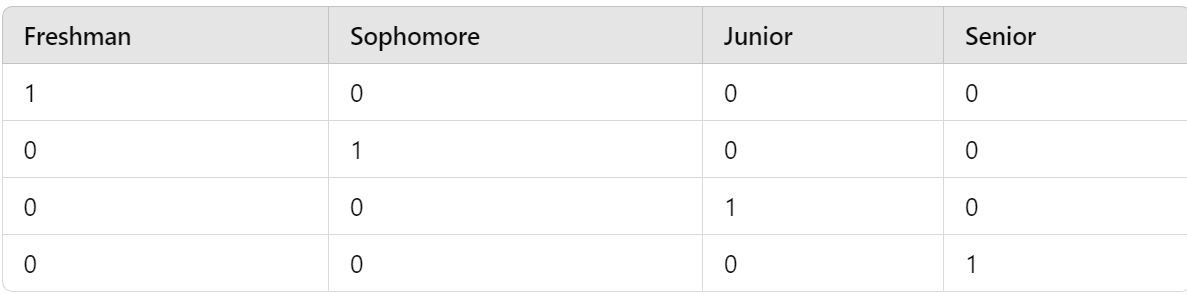

In [ ]:
# імпортуємо клас OneHotEncoder з бібліотеки sklearn, який дозволяє перетворювати категоріальні змінні в числові
from sklearn.preprocessing import OneHotEncoder

# Ініціалізуємо OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
'''sparse_output=False: Встановлює повернення щільної матриці (звичайний 2D масив), а не розрідженої (спрощує обробку).
drop='first': Видаляє перший стовпець для кожної категоріальної змінної, щоб уникнути дублювання інформації. 
Наприклад, якщо змінна Grade_level має 4 категорії, One-Hot Encoding створить лише три бінарних стовпчики, а не чотири.'''

# Застосовуємо OneHotEncoder до категоріальних стовпців
encoded_columns = encoder.fit_transform(df[categorical_columns])

# Створюємо новий DataFrame з перекодованими змінними і назвами колонок
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# Об'єднуємо початковий DataFrame з новими перекодованими стовпцями
df = df.drop(columns=categorical_columns)  # Видаляємо оригінальні категоріальні стовпці
df = pd.concat([df, encoded_df], axis=1)

# Перевіряємо результати
print(df.head())

### 4.2. Масштабування (шкалювання) кількісних змінних.

Популярними методами масштабування кількісних змінних є нормалізація та стандартизація, що передбачає перетворення даних, щоб зробити їх більш придатними для моделювання. Ці методи можуть допомогти покращити продуктивність моделі, зменшити вплив викидів і гарантувати, що дані матимуть однаковий масштаб.  
   
**Чому ми повинні масштабувати ознаки?**

Деякі алгоритми машинного навчання чутливі до масштабу ознак, а інші  - практично ні. Наприклад:  
**1. Алгоритми на основі градієнтного спуску**
Алгоритми машинного навчання, такі як лінійна регресія, логістична регресія, нейронна мережа, PCA (аналіз головних компонентів) тощо, які використовують градієнтний спуск як метод оптимізації, потребують масштабування даних.  
**2. Алгоритми на основі відстані**
Масштаб ознак найбільше впливає на такі алгоритми, що грунтуються на розрахунку відстаней, як KNN, кластеризація K-середніх і SVM. 

**3. Алгоритми дерева рішень та випадкового лісу**  
Дані алгоритми є досить нечутливими до масштабу ознак.

Нормалізувати чи стандартизувати?  
  
| Нормалізація | Стандартизація |
|:-------- |:------- |
| Перемасштабує значення до діапазону від 0 до 1 | Центрує дані навколо середнього значення та масштабує до стандартного відхилення 1 |
| Чутливий до викидів |Менш чутливий до викидів |
| Зберігає форму вихідного розподілу | Змінює форму вихідного розподілу |
  
  
  Головне питання – нормалізувати чи стандартизувати?

Однак, немає жорсткого правила, яке б вказувало вам, коли нормалізувати або стандартизувати ваші дані. Ви можете почати з адаптації своєї моделі до необроблених, нормалізованих і стандартизованих даних і порівняти якість побудованих моделей.  

In [ ]:
#імпортуємо клас StandardScaler з sklearn, який використовується для стандартизації даних
from sklearn.preprocessing import StandardScaler

# Ініціалізуємо StandardScaler
scaler = StandardScaler()

# Стандартизуємо кількісні ознаки
standardized_columns = scaler.fit_transform(df[numeric_columns])

# Перетворюємо стандартизовані дані в DataFrame з відповідними назвами стовпців
standardized_df = pd.DataFrame(standardized_columns, columns=numeric_columns, index=df.index)

# Видаляємо початкові кількісні ознаки
df = df.drop(columns=numeric_columns)

# Додаємо стандартизовані ознаки назад до DataFrame
df = pd.concat([df, standardized_df], axis=1)

# Перевіряємо результат
print(df.head())

In [ ]:
df.info()